In [1]:
import json 
import pandas as pd
import gzip
import os
os.getcwd()

'C:\\Users\\mearv\\OneDrive\\Desktop\\Self Projects'

In [2]:
os.chdir('C:\\Users\\mearv\\OneDrive\\Desktop')

In [3]:
with open('StreamingHistory0.json',encoding='utf-8') as fp:
    data = json.load(fp)

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2022-02-12 01:34,Kanye West,Can't Tell Me Nothing,206122
1,2022-02-12 01:34,Kanye West,Can't Tell Me Nothing,1066
2,2022-02-12 01:35,Kanye West,Can't Tell Me Nothing,6357
3,2022-02-12 01:39,Swedish House Mafia,Moth To A Flame (with The Weeknd),234000
4,2022-02-12 01:43,FATE,Darkness,135500


In [6]:
df.shape

(10000, 4)

In [7]:
df.duplicated().any()

False

In [8]:
df.isnull().sum()

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

In [10]:
with open('StreamingHistory1.json',encoding='utf-8') as fp:
    data_1 = json.load(fp)
df_1=pd.DataFrame(data_1)

In [11]:
df_1.head()

,endTime,artistName,trackName,msPlayed
0,2022-08-05 20:36,Basstrologe,Somebody To Love,136195
1,2022-08-05 20:39,Major Lazer,Light It Up - Remix,166138
2,2022-08-05 20:43,Arivu,Namma Stories,228347
3,2022-08-05 20:46,The White Stripes,Seven Nation Army,232106
4,2022-08-05 20:50,The Weeknd,Blinding Lights,200040


## Let's deal with the first data

In [12]:
df.endTime.max(),df.endTime.min()

('2022-08-05 20:34', '2022-02-12 01:34')

In [13]:
df_1.endTime.max(),df_1.endTime.min()

('2023-02-12 19:04', '2022-08-05 20:36')

In [14]:
df.endTime.dtype

dtype('O')

In [23]:
df

,endTime,artistName,trackName,msPlayed
0,2022-02-12 01:34,Kanye West,Can't Tell Me Nothing,206122
1,2022-02-12 01:34,Kanye West,Can't Tell Me Nothing,1066
2,2022-02-12 01:35,Kanye West,Can't Tell Me Nothing,6357
3,2022-02-12 01:39,Swedish House Mafia,Moth To A Flame (with The Weeknd),234000
4,2022-02-12 01:43,FATE,Darkness,135500
...,...,...,...,...
9995,2022-08-05 20:20,S. P. Balasubrahmanyam,Oruvan Oruvan Mudalali,381411
9996,2022-08-05 20:24,Vijay,Selfie Pulla,293000
9997,2022-08-05 20:27,Akon,Holla Holla,180186
9998,2022-08-05 20:31,*NSYNC,Bye Bye Bye,200560


In [25]:
df['Time_sample']=pd.to_datetime(df['endTime'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   endTime      10000 non-null  object        
 1   artistName   10000 non-null  object        
 2   trackName    10000 non-null  object        
 3   msPlayed     10000 non-null  int64         
 4   Time_sample  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 390.8+ KB


In [27]:
df['Time']=df['Time_sample'].dt.time

In [28]:
df['Date']=df['Time_sample'].dt.date

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   endTime      10000 non-null  object        
 1   artistName   10000 non-null  object        
 2   trackName    10000 non-null  object        
 3   msPlayed     10000 non-null  int64         
 4   Time_sample  10000 non-null  datetime64[ns]
 5   Time         10000 non-null  object        
 6   Date         10000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 547.0+ KB


In [30]:
df.drop(columns='Time_sample',inplace=True)
df.head()

,endTime,artistName,trackName,msPlayed,Time,Date
0,2022-02-12 01:34,Kanye West,Can't Tell Me Nothing,206122,01:34:00,2022-02-12
1,2022-02-12 01:34,Kanye West,Can't Tell Me Nothing,1066,01:34:00,2022-02-12
2,2022-02-12 01:35,Kanye West,Can't Tell Me Nothing,6357,01:35:00,2022-02-12
3,2022-02-12 01:39,Swedish House Mafia,Moth To A Flame (with The Weeknd),234000,01:39:00,2022-02-12
4,2022-02-12 01:43,FATE,Darkness,135500,01:43:00,2022-02-12


### We've extracted date and time separately, now lets convert msplayed to actual mins

In [31]:
df['Mins_played']=df['msPlayed'].apply(lambda x : x/60000)

In [32]:
df['Date']=pd.to_datetime(df['Date'])

In [33]:
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [34]:
df

,endTime,artistName,trackName,msPlayed,Time,Date,Mins_played,Month,Day
0,2022-02-12 01:34,Kanye West,Can't Tell Me Nothing,206122,01:34:00,2022-02-12,3.435367,2,12
1,2022-02-12 01:34,Kanye West,Can't Tell Me Nothing,1066,01:34:00,2022-02-12,0.017767,2,12
2,2022-02-12 01:35,Kanye West,Can't Tell Me Nothing,6357,01:35:00,2022-02-12,0.105950,2,12
3,2022-02-12 01:39,Swedish House Mafia,Moth To A Flame (with The Weeknd),234000,01:39:00,2022-02-12,3.900000,2,12
4,2022-02-12 01:43,FATE,Darkness,135500,01:43:00,2022-02-12,2.258333,2,12
...,...,...,...,...,...,...,...,...,...
9995,2022-08-05 20:20,S. P. Balasubrahmanyam,Oruvan Oruvan Mudalali,381411,20:20:00,2022-08-05,6.356850,8,5
9996,2022-08-05 20:24,Vijay,Selfie Pulla,293000,20:24:00,2022-08-05,4.883333,8,5
9997,2022-08-05 20:27,Akon,Holla Holla,180186,20:27:00,2022-08-05,3.003100,8,5
9998,2022-08-05 20:31,*NSYNC,Bye Bye Bye,200560,20:31:00,2022-08-05,3.342667,8,5


### We have extracted as many columns as we need for analysis, let's move to EDA

In [35]:
new_df=df.drop(columns=['endTime','msPlayed'])

In [36]:
new_df.head()
new_df.to_excel('Arvind_spotify_Data.xlsx',index=False)

In [37]:
new_df['Date'][0]

Timestamp('2022-02-12 00:00:00')

## EDA in Tableau

In [38]:
df

,endTime,artistName,trackName,msPlayed,Time,Date,Mins_played,Month,Day
0,2022-02-12 01:34,Kanye West,Can't Tell Me Nothing,206122,01:34:00,2022-02-12,3.435367,2,12
1,2022-02-12 01:34,Kanye West,Can't Tell Me Nothing,1066,01:34:00,2022-02-12,0.017767,2,12
2,2022-02-12 01:35,Kanye West,Can't Tell Me Nothing,6357,01:35:00,2022-02-12,0.105950,2,12
3,2022-02-12 01:39,Swedish House Mafia,Moth To A Flame (with The Weeknd),234000,01:39:00,2022-02-12,3.900000,2,12
4,2022-02-12 01:43,FATE,Darkness,135500,01:43:00,2022-02-12,2.258333,2,12
...,...,...,...,...,...,...,...,...,...
9995,2022-08-05 20:20,S. P. Balasubrahmanyam,Oruvan Oruvan Mudalali,381411,20:20:00,2022-08-05,6.356850,8,5
9996,2022-08-05 20:24,Vijay,Selfie Pulla,293000,20:24:00,2022-08-05,4.883333,8,5
9997,2022-08-05 20:27,Akon,Holla Holla,180186,20:27:00,2022-08-05,3.003100,8,5
9998,2022-08-05 20:31,*NSYNC,Bye Bye Bye,200560,20:31:00,2022-08-05,3.342667,8,5


In [40]:
import seaborn as sns

<AxesSubplot:>

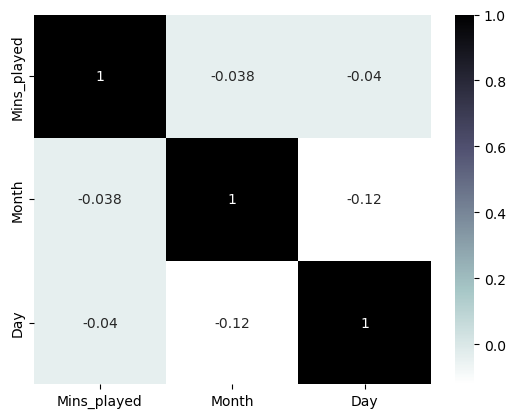

In [47]:
sns.heatmap(new_df.corr(),annot=True,cmap='bone_r')